<h1>Stock Market Price Prediction</h1>

<h3> Question </h3>
Can we use a stock market value API to predict future prices for the Tesla stock with and accuracy score of 85% or higher?

<h2> Packages </h2>

In [1]:
# Load in required packages
import requests
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sn

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

<h2> Analysis </h2>

In [2]:
# Connect with Stock market API and create DataFrame.
    # Use 60 minute intervals and Tesla stock.
    # Transpose the data for simplification and easy reading.
url = url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=60min&apikey=4DRQ3QJQN5FVYRA9'
r = requests.get(url)
data = r.json()

data = data['Time Series (60min)']
df = pd.DataFrame(data)

df = df.T.reset_index()

df

,index,1. open,2. high,3. low,4. close,5. volume
0,2025-02-07 19:00:00,358.3000,358.6800,357.3200,357.3800,376649
1,2025-02-07 18:00:00,360.2000,360.5000,357.5800,358.3400,600885
2,2025-02-07 17:00:00,361.2400,600.4579,179.7697,360.1900,402582
3,2025-02-07 16:00:00,361.4900,600.4579,203.9798,361.2000,7030598
4,2025-02-07 15:00:00,364.3800,364.3868,360.3400,361.4900,11715678
...,...,...,...,...,...,...
95,2025-01-31 04:00:00,401.2000,402.9000,399.1000,400.1600,141393
96,2025-01-30 19:00:00,401.8700,401.8900,400.8000,400.8100,94936
97,2025-01-30 18:00:00,400.6000,402.0000,400.2800,401.8100,438532
98,2025-01-30 17:00:00,399.6200,411.9387,374.5036,400.5122,145878


In [3]:
# Rename the column names to remove excess digits and 'index' label.
df = df.rename(columns={"index": "DateTime", '1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})

In [4]:
# Examine the data.
    # Check data types, nulls, duplicates, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  100 non-null    object
 1   open      100 non-null    object
 2   high      100 non-null    object
 3   low       100 non-null    object
 4   close     100 non-null    object
 5   volume    100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

DateTime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Through inital exploration, I have found no duplciated or null values, and each data type is currently 'object' and will require changing for further mathematical use.

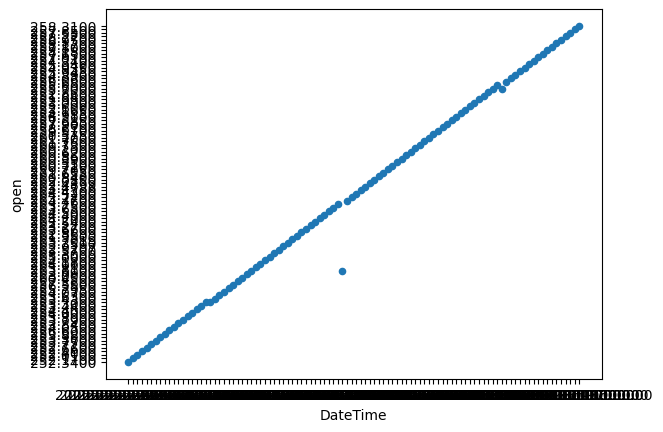

In [19]:
df.plot(x='DateTime', y='open', kind='scatter');

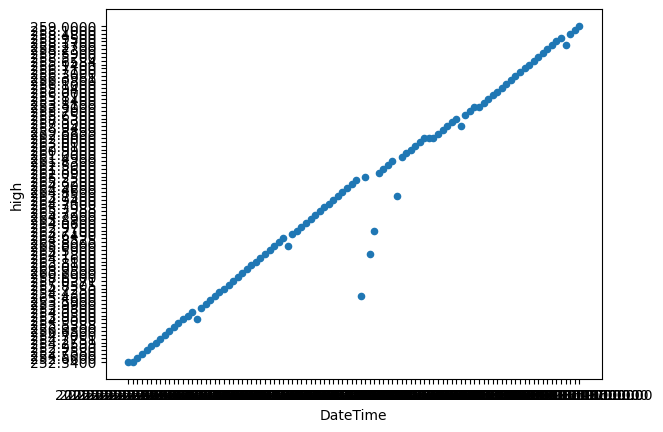

In [20]:
df.plot(x='DateTime', y='high', kind='scatter');

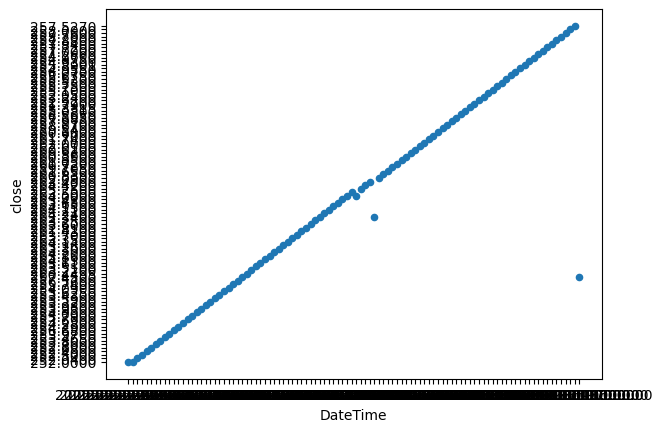

In [21]:
df.plot(x='DateTime', y='close', kind='scatter');

In [26]:
X = df.drop(['DateTime', 'high'], axis=1)
y = df['high']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = XGBRegressor()

model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:open: object, low: object, close: object, volume: object

In [ ]:
pre